<h1 align="center" style="color:blue">Its a Classification ML model to suggest credit default risk for new customer </h1>

In [157]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [158]:
# load the dataset customers, loans, and bureau from data folder
customers = pd.read_csv('D:/Desktop/OneDrive - shivameducation.net/Documents/AJIT_YADAV/CodeBasicsBootCamp/CodeBasicsProjects/ML-Projects/CreditRisk-ClassificationProject/MainProject/data/customers.csv')
loans = pd.read_csv('D:/Desktop/OneDrive - shivameducation.net/Documents/AJIT_YADAV/CodeBasicsBootCamp/CodeBasicsProjects/ML-Projects/CreditRisk-ClassificationProject/MainProject/data/loans.csv')
bureau = pd.read_csv('D:/Desktop/OneDrive - shivameducation.net/Documents/AJIT_YADAV/CodeBasicsBootCamp/CodeBasicsProjects/ML-Projects/CreditRisk-ClassificationProject/MainProject/data/bureau_data.csv')




In [159]:
# merge the dataset customers, loans, and bureau on customer_id
df = pd.merge(customers, loans, on='cust_id')
df = pd.merge(df, bureau, on='cust_id')

# check the info of the dataset
df.shape


(50000, 33)

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cust_id                      50000 non-null  object 
 1   age                          50000 non-null  int64  
 2   gender                       50000 non-null  object 
 3   marital_status               50000 non-null  object 
 4   employment_status            50000 non-null  object 
 5   income                       50000 non-null  int64  
 6   number_of_dependants         50000 non-null  int64  
 7   residence_type               49938 non-null  object 
 8   years_at_current_address     50000 non-null  int64  
 9   city                         50000 non-null  object 
 10  state                        50000 non-null  object 
 11  zipcode                      50000 non-null  int64  
 12  loan_id                      50000 non-null  object 
 13  loan_purpose    

In [161]:
# convert the default column (target variable) to int type
df['default'] = df['default'].astype(int)

# check the info of the dataset
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cust_id                      50000 non-null  object 
 1   age                          50000 non-null  int64  
 2   gender                       50000 non-null  object 
 3   marital_status               50000 non-null  object 
 4   employment_status            50000 non-null  object 
 5   income                       50000 non-null  int64  
 6   number_of_dependants         50000 non-null  int64  
 7   residence_type               49938 non-null  object 
 8   years_at_current_address     50000 non-null  int64  
 9   city                         50000 non-null  object 
 10  state                        50000 non-null  object 
 11  zipcode                      50000 non-null  int64  
 12  loan_id                      50000 non-null  object 
 13  loan_purpose    

In [162]:
# check the count of zero and non-zero values in the target variable
df['default'].value_counts()






default
0    45703
1     4297
Name: count, dtype: int64

In [163]:
# default value counts shows that the dataset is imbalanced
# we need to balance the dataset

# we will use SMOTE to balance the dataset (Synthetic Minority Over-sampling Technique)
# at later stage




<h2 align="center" style="color:blue">Train Test Split</h2>
<p>We perform train test split before doing EDA to prevent data leakage. We don't want test set (which is part of the entire dataset) to influence EDA or any decisions on feature engineering. </p>

In [164]:
# import train_test_split from sklearn
from sklearn.model_selection import train_test_split
X = df.drop("default", axis="columns")
y = df['default']

X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.25,random_state=42)

df_train = pd.concat([X_train, y_train], axis="columns")
df_test = pd.concat([X_test, y_test], axis="columns")


<h2 align="center" style="color:blue">Data Cleaning </h2>

<p>Handle missing and duplicate values in df_train and df_test </p>

In [165]:
df_train.isnull().sum()

cust_id                         0
age                             0
gender                          0
marital_status                  0
employment_status               0
income                          0
number_of_dependants            0
residence_type                 47
years_at_current_address        0
city                            0
state                           0
zipcode                         0
loan_id                         0
loan_purpose                    0
loan_type                       0
sanction_amount                 0
loan_amount                     0
processing_fee                  0
gst                             0
net_disbursement                0
loan_tenure_months              0
principal_outstanding           0
bank_balance_at_application     0
disbursal_date                  0
installment_start_dt            0
number_of_open_accounts         0
number_of_closed_accounts       0
total_loan_months               0
delinquent_months               0
total_dpd     

In [166]:
df_test.isnull().sum()

cust_id                         0
age                             0
gender                          0
marital_status                  0
employment_status               0
income                          0
number_of_dependants            0
residence_type                 15
years_at_current_address        0
city                            0
state                           0
zipcode                         0
loan_id                         0
loan_purpose                    0
loan_type                       0
sanction_amount                 0
loan_amount                     0
processing_fee                  0
gst                             0
net_disbursement                0
loan_tenure_months              0
principal_outstanding           0
bank_balance_at_application     0
disbursal_date                  0
installment_start_dt            0
number_of_open_accounts         0
number_of_closed_accounts       0
total_loan_months               0
delinquent_months               0
total_dpd     

In [167]:
# replace missing values with mode of residence_type column in df_train and df_test
# Get the mode of 'residence_type' from df_train
residence_type_mode = df_train['residence_type'].mode()[0]

# Fill missing values in both train and test set
df_train['residence_type'].fillna(residence_type_mode, inplace=True)
df_test['residence_type'].fillna(residence_type_mode, inplace=True)

# check the missing values in df_train and df_test
df_train.isnull().sum()





cust_id                        0
age                            0
gender                         0
marital_status                 0
employment_status              0
income                         0
number_of_dependants           0
residence_type                 0
years_at_current_address       0
city                           0
state                          0
zipcode                        0
loan_id                        0
loan_purpose                   0
loan_type                      0
sanction_amount                0
loan_amount                    0
processing_fee                 0
gst                            0
net_disbursement               0
loan_tenure_months             0
principal_outstanding          0
bank_balance_at_application    0
disbursal_date                 0
installment_start_dt           0
number_of_open_accounts        0
number_of_closed_accounts      0
total_loan_months              0
delinquent_months              0
total_dpd                      0
enquiry_co

In [168]:
df_test.isnull().sum()

cust_id                        0
age                            0
gender                         0
marital_status                 0
employment_status              0
income                         0
number_of_dependants           0
residence_type                 0
years_at_current_address       0
city                           0
state                          0
zipcode                        0
loan_id                        0
loan_purpose                   0
loan_type                      0
sanction_amount                0
loan_amount                    0
processing_fee                 0
gst                            0
net_disbursement               0
loan_tenure_months             0
principal_outstanding          0
bank_balance_at_application    0
disbursal_date                 0
installment_start_dt           0
number_of_open_accounts        0
number_of_closed_accounts      0
total_loan_months              0
delinquent_months              0
total_dpd                      0
enquiry_co

In [169]:
# check the duplicate values in df_train and df_test
df_train.duplicated().sum()






np.int64(0)

In [170]:
df_test.duplicated().sum()

np.int64(0)

In [171]:
# filter categorical columns from df_train and df_test and store it in categorical_columns
categorical_columns = df_train.select_dtypes(include=['object']).columns
categorical_columns











Index(['cust_id', 'gender', 'marital_status', 'employment_status',
       'residence_type', 'city', 'state', 'loan_id', 'loan_purpose',
       'loan_type', 'disbursal_date', 'installment_start_dt'],
      dtype='object')

In [172]:
#  default is a binary column so i need to append it to categorical_columns
categorical_columns = np.append(categorical_columns, 'default')
categorical_columns





array(['cust_id', 'gender', 'marital_status', 'employment_status',
       'residence_type', 'city', 'state', 'loan_id', 'loan_purpose',
       'loan_type', 'disbursal_date', 'installment_start_dt', 'default'],
      dtype=object)

In [173]:
# similarly filter continuous columns from df_train and df_test and store it in continuous_columns
continuous_columns = df_train.select_dtypes(include=['int64', 'float64']).columns
continuous_columns





Index(['age', 'income', 'number_of_dependants', 'years_at_current_address',
       'zipcode', 'sanction_amount', 'loan_amount', 'processing_fee', 'gst',
       'net_disbursement', 'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default'],
      dtype='object')

In [174]:
# look for all the unique values in categorical_columns
for col in categorical_columns:
    print(f"Unique values in {col}: {df_train[col].unique()}")





Unique values in cust_id: ['C12747' 'C32496' 'C43676' ... 'C45237' 'C49229' 'C37785']
Unique values in gender: ['M' 'F']
Unique values in marital_status: ['Married' 'Single']
Unique values in employment_status: ['Self-Employed' 'Salaried']
Unique values in residence_type: ['Owned' 'Mortgage' 'Rented']
Unique values in city: ['Hyderabad' 'Mumbai' 'Chennai' 'Bangalore' 'Pune' 'Kolkata' 'Ahmedabad'
 'Delhi' 'Lucknow' 'Jaipur']
Unique values in state: ['Telangana' 'Maharashtra' 'Tamil Nadu' 'Karnataka' 'West Bengal'
 'Gujarat' 'Delhi' 'Uttar Pradesh' 'Rajasthan']
Unique values in loan_id: ['L12747' 'L32496' 'L43676' ... 'L45237' 'L49229' 'L37785']
Unique values in loan_purpose: ['Home' 'Education' 'Personal' 'Auto' 'Personaal']
Unique values in loan_type: ['Secured' 'Unsecured']
Unique values in disbursal_date: ['2020-10-31' '2022-10-22' '2023-12-04' ... '2022-02-07' '2019-10-30'
 '2022-10-04']
Unique values in installment_start_dt: ['2020-11-11' '2022-10-27' '2023-12-29' ... '2024-08-19' 

In [175]:
# in loan_purpose column, replace Personal with Personal Loan
df_train['loan_purpose'].replace('Personaal', 'Personal', inplace=True)

# check the unique values in loan_purpose column again
df_train['loan_purpose'].unique()





array(['Home', 'Education', 'Personal', 'Auto'], dtype=object)

In [176]:
# do same for df_test
df_test['loan_purpose'].replace('Personaal', 'Personal', inplace=True)

<h3 align="left" style="color:green">check the outliers </h3>

In [177]:
df_train.describe()

,age,income,number_of_dependants,years_at_current_address,zipcode,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,...,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default
count,37500.000,37500.000,37500.000,37500.000,37500.000,37500.000,37500.000,37500.000,37500.000,37500.000,...,37500.000,37500.000,37500.000,37500.000,37500.000,37500.000,37500.000,37500.000,37500.000,37500.000
mean,39.541,2633326.160,1.945,15.998,418866.253,4699691.573,3996067.733,80290.677,719292.192,3196854.187,...,1333819.515,986298.868,2.503,1.001,76.111,4.845,26.673,5.009,43.425,0.086
std,9.858,2623780.517,1.536,8.921,169035.022,6257832.982,5371862.293,113128.140,966935.213,4297489.834,...,1213674.444,1043145.014,1.119,0.814,43.769,5.841,32.779,2.029,29.393,0.280
min,18.000,0.000,0.000,1.000,110001.000,0.000,0.000,0.000,0.000,0.000,...,-1.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000
25%,33.000,802000.000,0.000,8.000,302001.000,1142000.000,961000.000,19220.000,172980.000,768800.000,...,422197.500,287040.250,1.000,0.000,42.000,0.000,0.000,4.000,18.000,0.000
50%,39.000,1885000.000,2.000,16.000,400001.000,2644000.000,2230000.000,44600.000,401400.000,1784000.000,...,997427.500,665014.500,3.000,1.000,71.000,3.000,13.000,5.000,39.000,0.000
75%,46.000,3326250.000,3.000,24.000,560001.000,5178000.000,4619000.000,92420.000,831420.000,3695200.000,...,1784879.000,1234062.750,4.000,2.000,107.000,8.000,46.000,6.000,67.000,0.000
max,70.000,11999000.000,5.000,31.000,700001.000,52175000.000,47819000.000,5293543.524,8607420.000,38255200.000,...,5000000.000,7846643.000,4.000,2.000,223.000,24.000,171.000,9.000,99.000,1.000


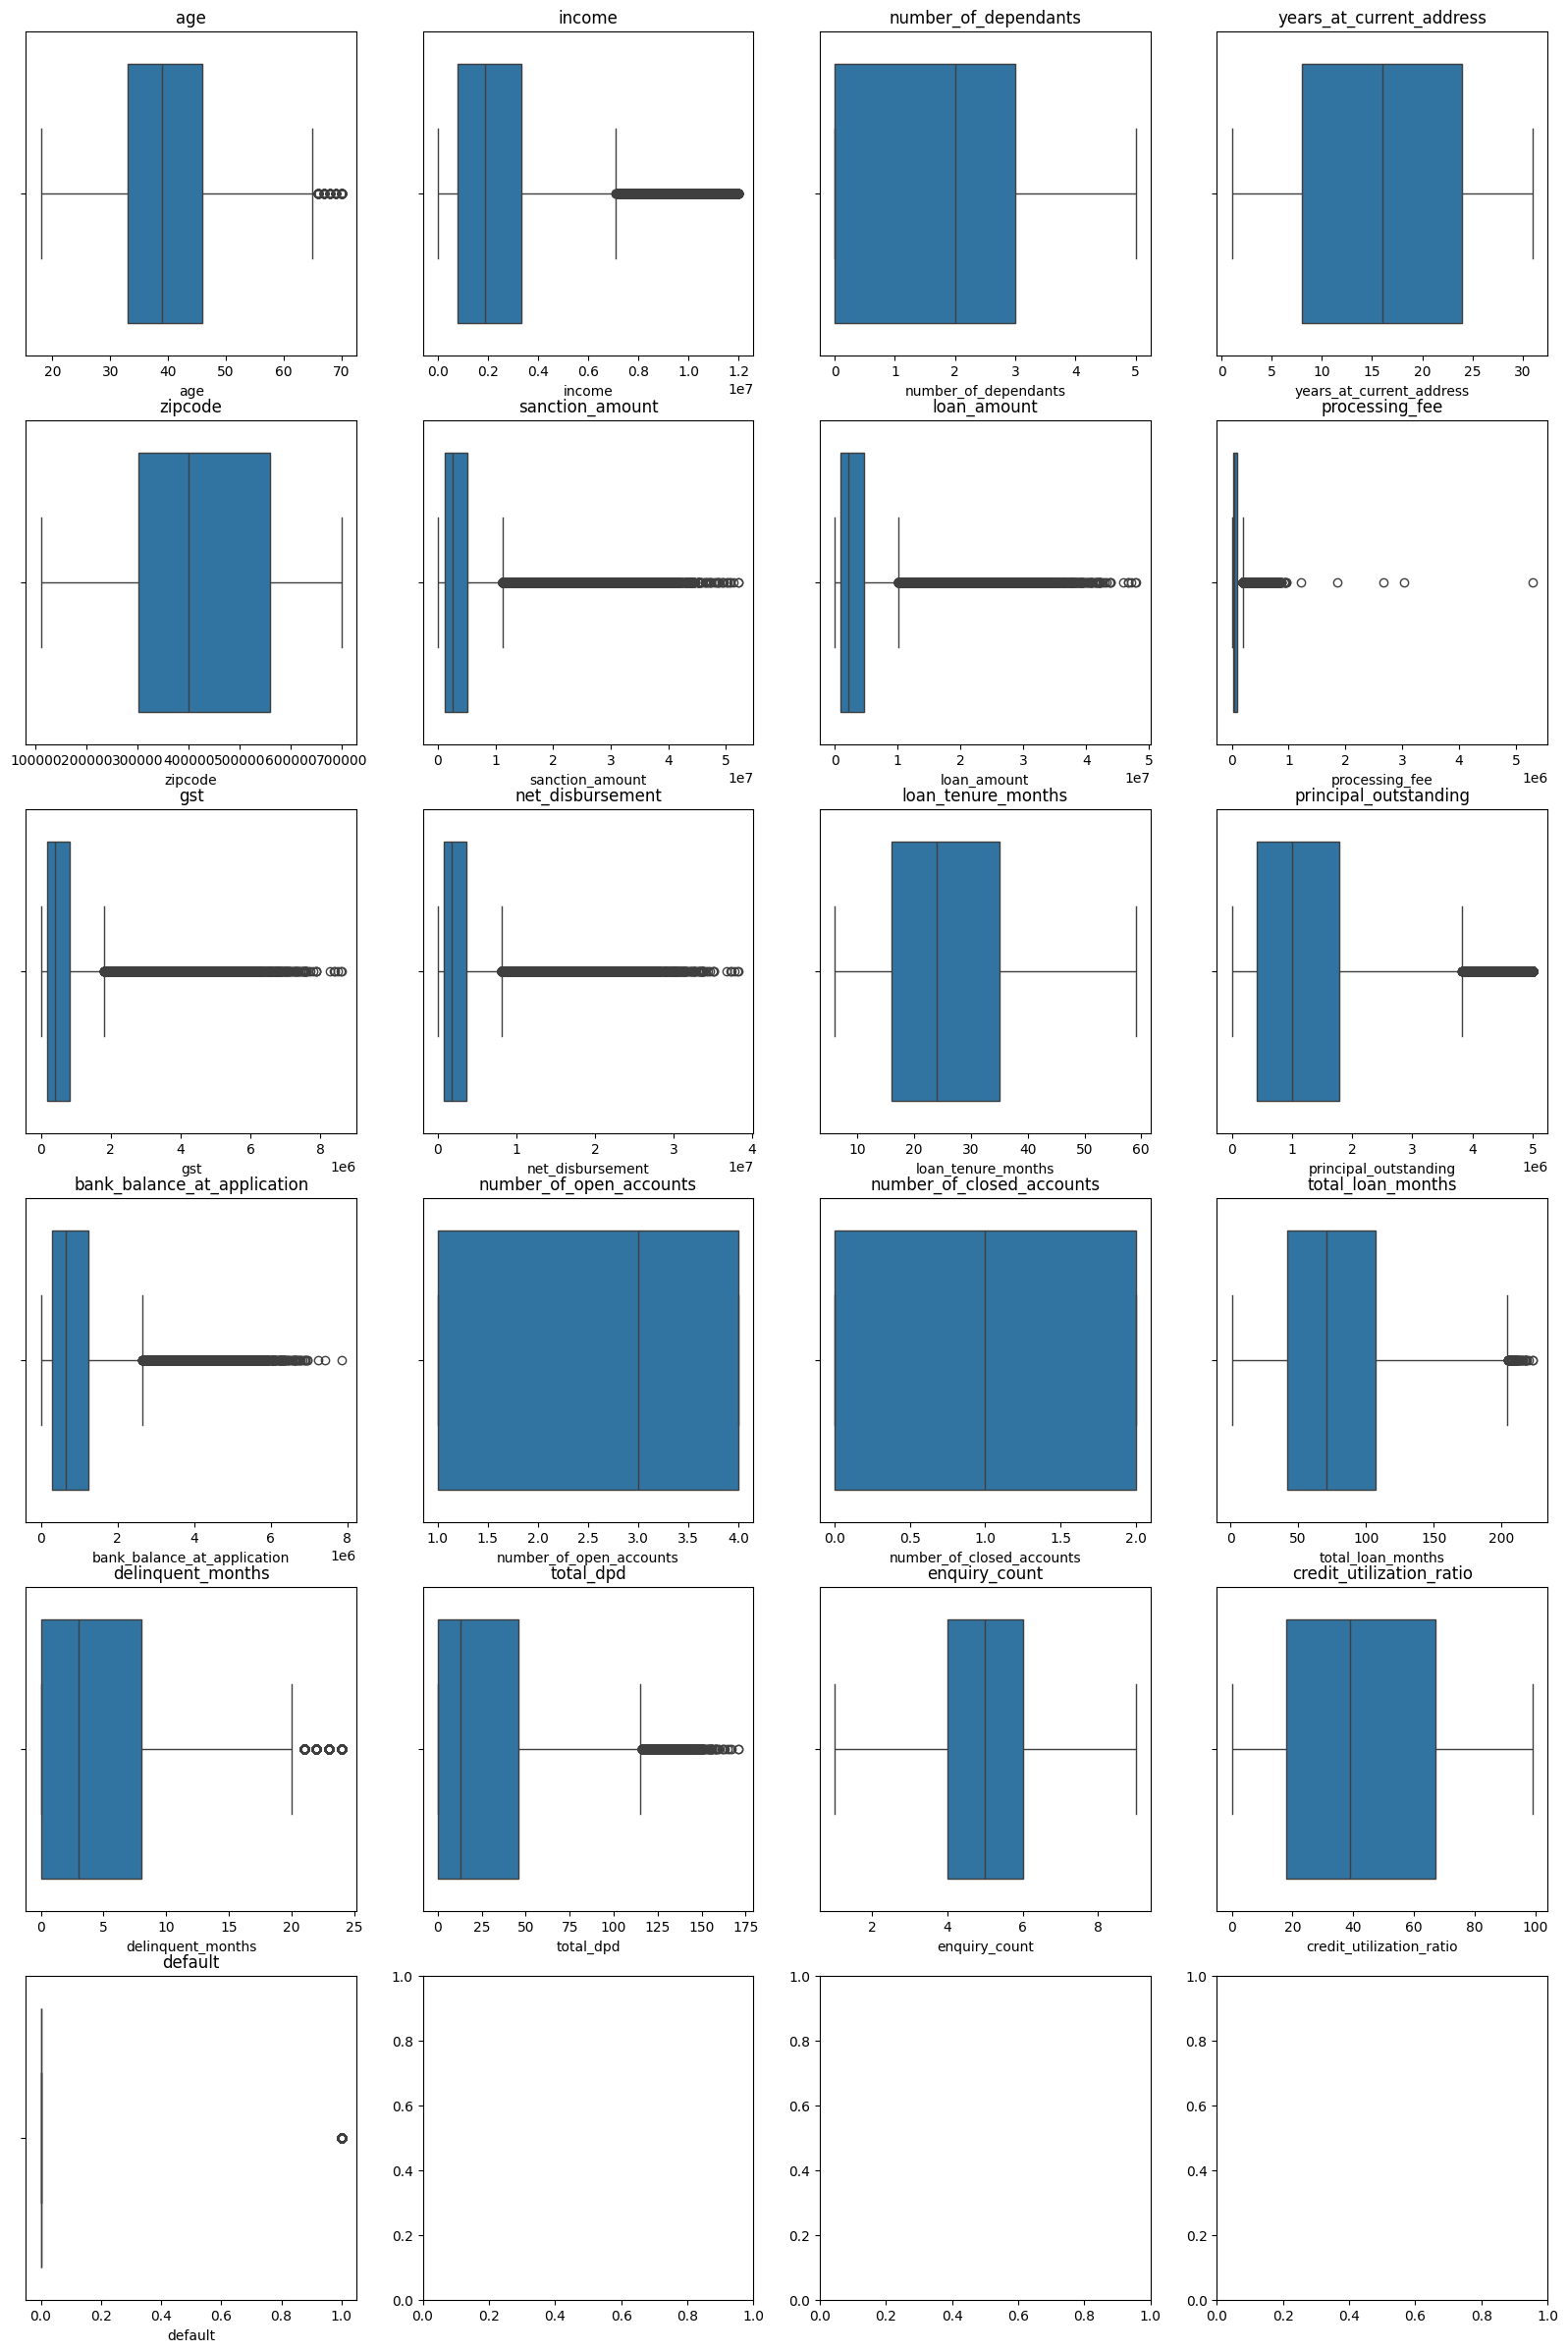

In [178]:
# next plot the boxplot for all the continuous columns to check the outliers
num_plots = len(continuous_columns)
num_cols = 4  # Number of plots per row
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows))  # Adjust the figure size as needed
axes = axes.flatten()  # Flatten the axes array for easier indexing

for i, col in enumerate(continuous_columns):
    sns.boxplot(x=df_train[col], ax=axes[i])
    axes[i].set_title(col)  # Set the title to the name of the variable
    





In [179]:
# looking at above plot, processing_fee has outliers so we need to treat them
# processing fee can not be 5 lac for 4 lac loan
# i will calculate ratio processing_fee to loan amount
df_train_1 = df_train[df_train.processing_fee/df_train.loan_amount<0.03].copy()
df_train_1.shape

(37488, 33)

In [180]:
# apply same concept to df_test
df_test_1 = df_test[df_test.processing_fee/df_test.loan_amount<0.03].copy()
df_test_1.shape


(12497, 33)

<h3>other business rule for data validation </h3>

In [181]:
# Rule 1: GST should not be more than 20%

df_train_1[(df_train_1.gst/df_train_1.loan_amount)>0.2].shape


(0, 33)

In [182]:
# Rule 1: GST should not be more than 20%

df_test_1[(df_test_1.gst/df_test_1.loan_amount)>0.2].shape

(0, 33)

In [183]:
# Rule 2: Net disbursement should not be higher than loan_amount
df_train_1[df_train_1.net_disbursement>df_train_1.loan_amount].shape

(0, 33)

In [184]:
# Rule 2: Net disbursement should not be higher than loan_amount
df_test_1[df_test_1.net_disbursement>df_test_1.loan_amount].shape

(0, 33)

<h2 align="left" style="color:green">Exploratry Data Analysis </h2>

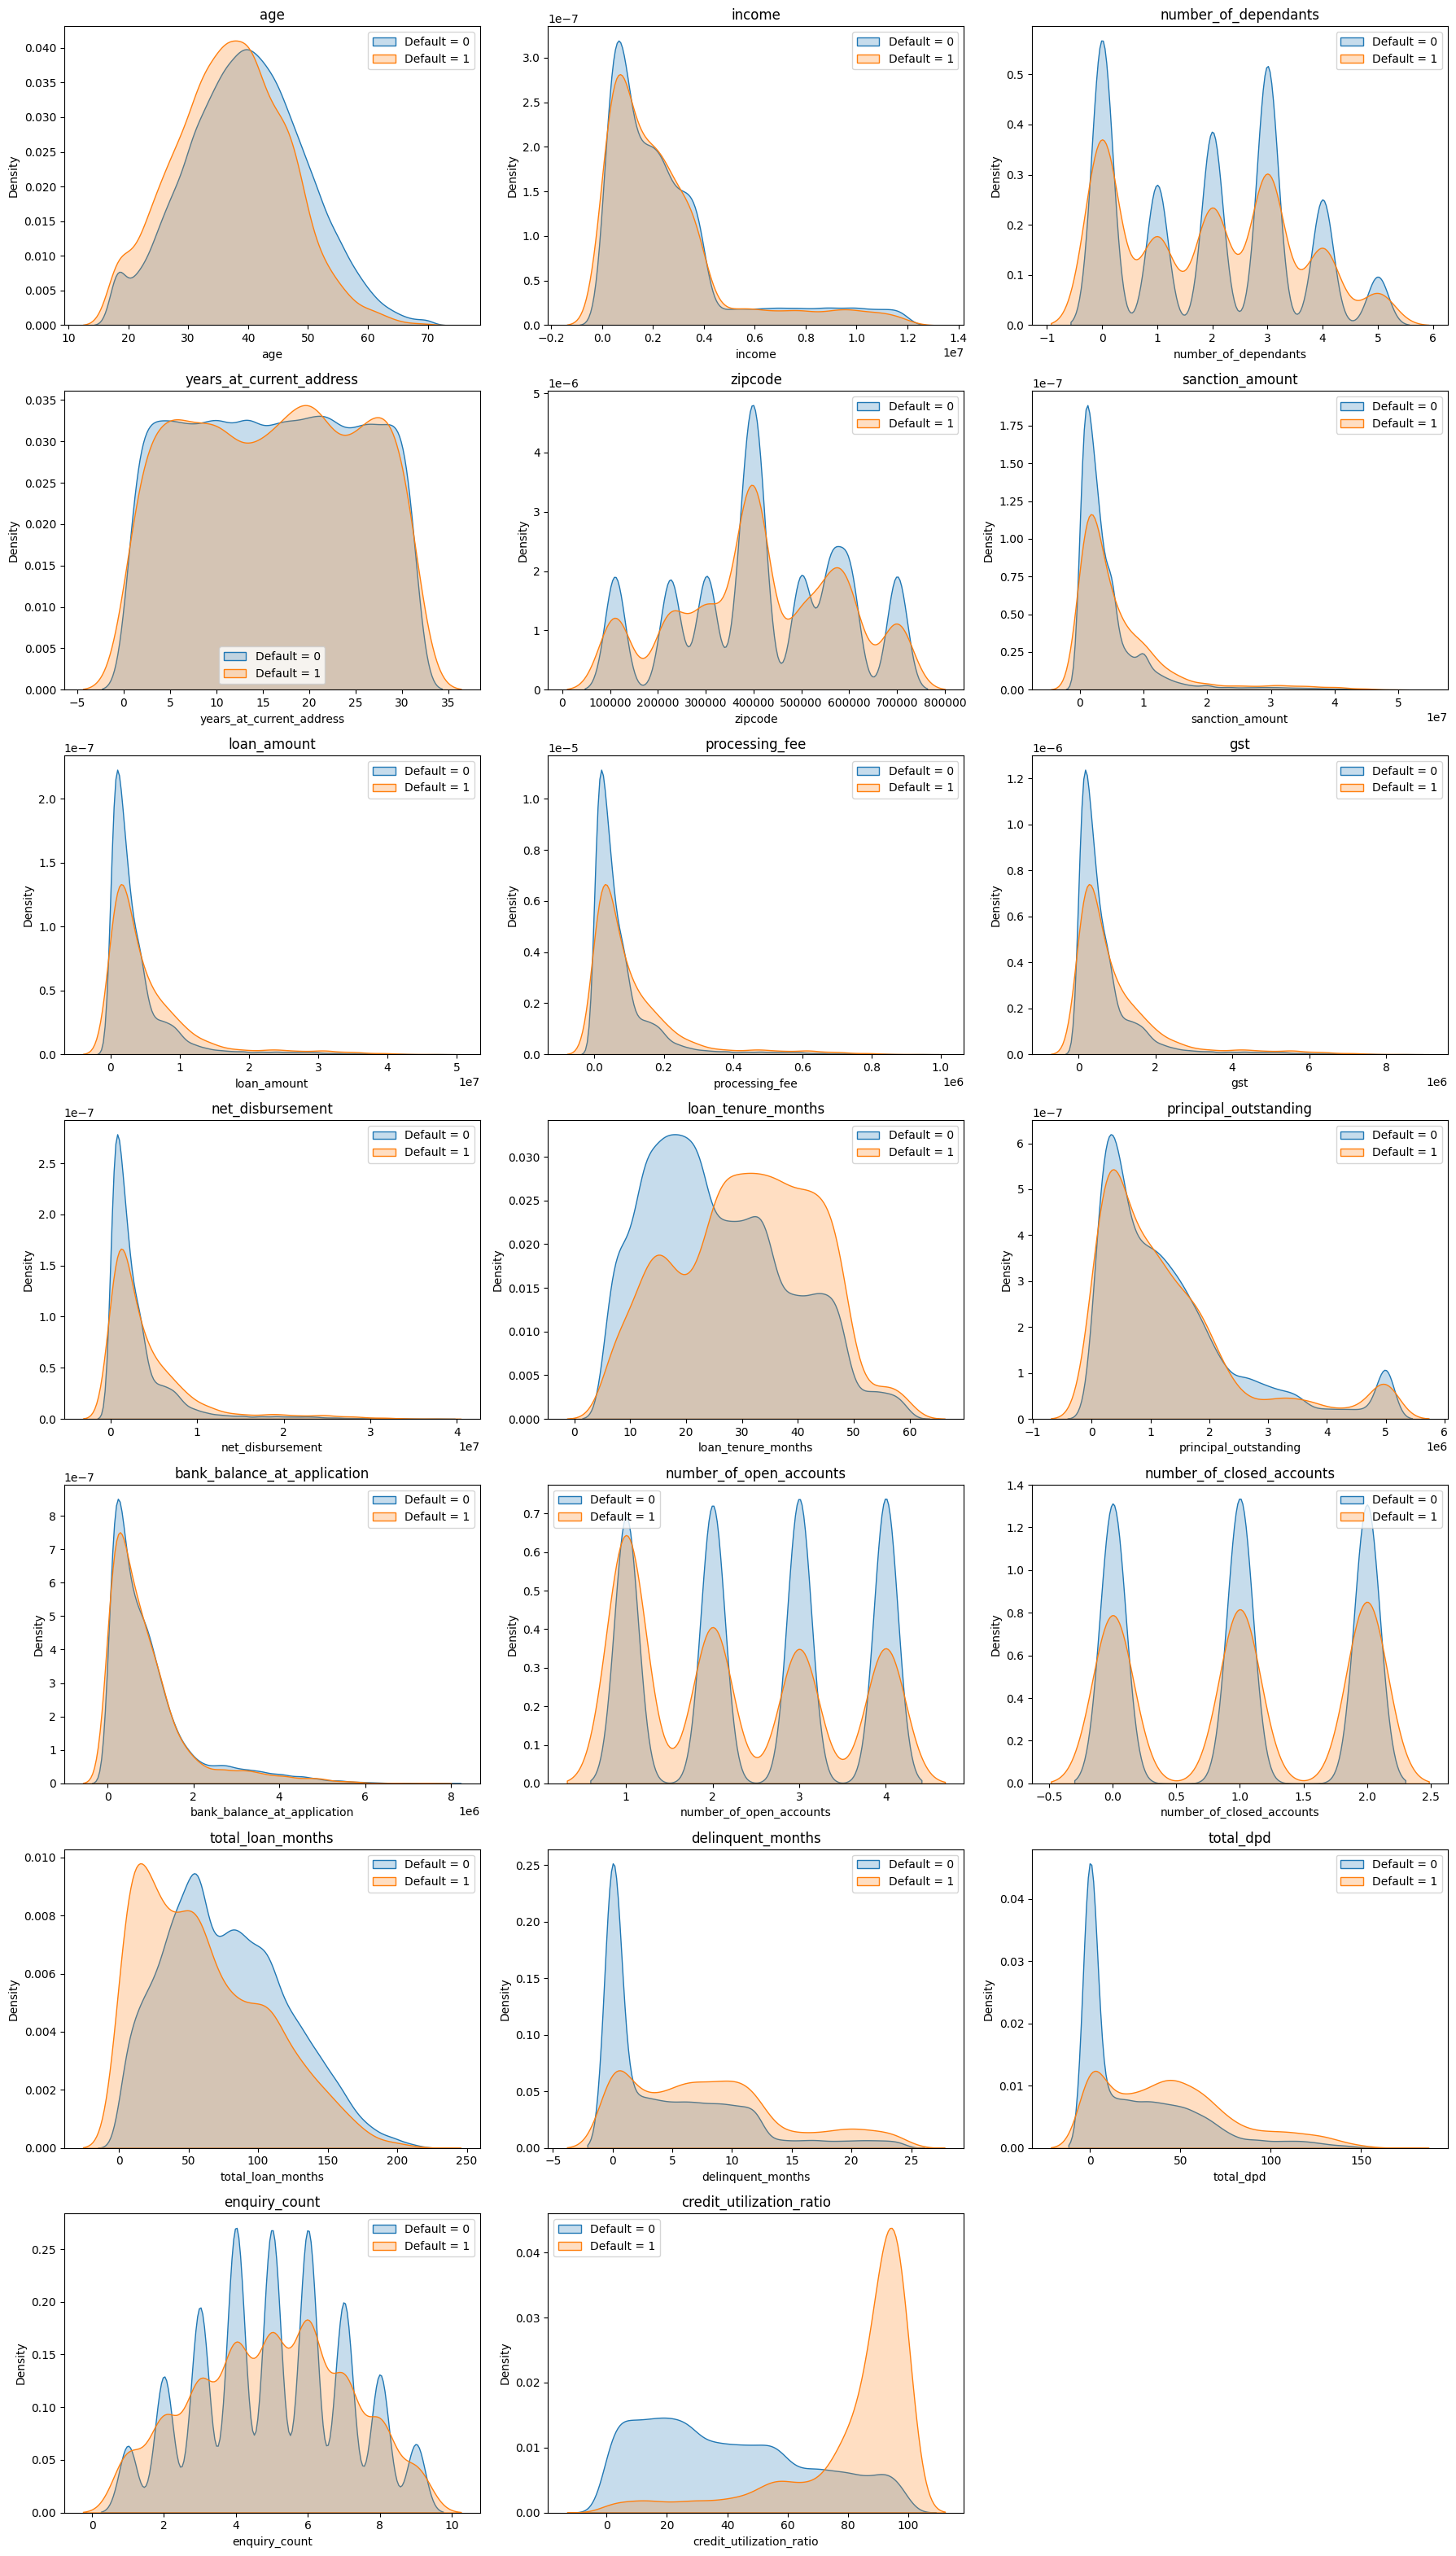

In [185]:
# draw KDE plot for all continuous columns w.r.t. default value 0 and 1





import seaborn as sns
import matplotlib.pyplot as plt

continuous_columns = [
    'age', 'income', 'number_of_dependants', 'years_at_current_address', 'zipcode',
    'sanction_amount', 'loan_amount', 'processing_fee', 'gst', 'net_disbursement',
    'loan_tenure_months', 'principal_outstanding', 'bank_balance_at_application',
    'number_of_open_accounts', 'number_of_closed_accounts', 'total_loan_months',
    'delinquent_months', 'total_dpd', 'enquiry_count', 'credit_utilization_ratio'
]

n_cols = 3
n_rows = int(np.ceil(len(continuous_columns) / n_cols))

plt.figure(figsize=(6 * n_cols, 4.5 * n_rows))
for i, col in enumerate(continuous_columns):
    plt.subplot(n_rows, n_cols, i + 1)
    # KDE plot for default = 0
    sns.kdeplot(df_train_1[df_train_1['default']==0][col], label='Default = 0', fill=True)
    # KDE plot for default = 1
    sns.kdeplot(df_train_1[df_train_1['default']==1][col], label='Default = 1', fill=True)
    plt.title(col)
    plt.xlabel(col)
    plt.legend()
plt.tight_layout()
plt.show()







<h3 align="left" style="color:green">Insights </h3>
1. younger population more likely to default
2. In columns: loan_tenure_months, delinquent_months, total_dpd, credit_utilization, higher values indicate high likelyhood of becoming a default. Hence these 4 looks like strong predictors
3. In remaining columns the distributions do not give any obvious insights
4. Why loan_amount and income did not give any signs of being strong predictors? May be when we combine these two and get loan to income ratio (LTI), that may have influence on the target variable. We will explore more later

<h2 style="color:blue" align="center">Feature Engineering, Feature Selection</h2>

In [186]:
# generate loan to income ratio (LTI)
df_train_1['loan_to_income'] = round(df_train_1['loan_amount'] / df_train_1['income'],2)
df_test_1['loan_to_income'] = round(df_test_1['loan_amount'] / df_test_1['income'],2)





In [187]:
df_train_1['loan_to_income'].describe()

count   37488.000
mean        1.557
std         0.974
min         0.300
25%         0.770
50%         1.160
75%         2.460
max         4.570
Name: loan_to_income, dtype: float64

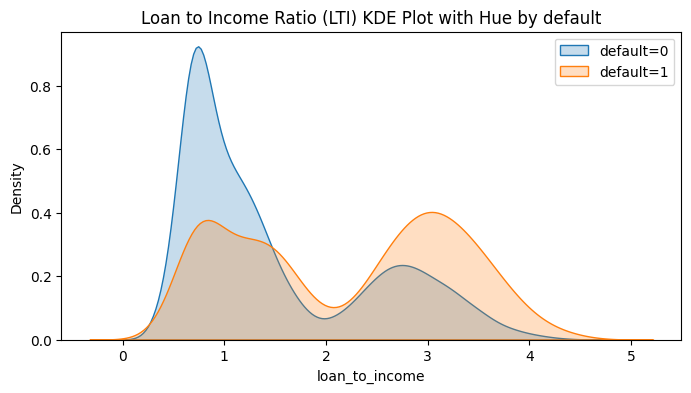

In [188]:
# create KDE plot for loan to income ratio (LTI)
plt.figure(figsize=(8, 4))
sns.kdeplot(df_train_1['loan_to_income'][df_train_1['default'] == 0], fill=True, label='default=0')
sns.kdeplot(df_train_1['loan_to_income'][df_train_1['default'] == 1], fill=True, label='default=1')
plt.title(f"Loan to Income Ratio (LTI) KDE Plot with Hue by default")
plt.legend()
plt.show()

<h3 align="left">Insights</h3>
1. Blue graph has majority of its values on lower side of LTI
2. Orange graph has many values when LTI is higher indicating that higher LTI means high risk loan

In [189]:
# generate delinquency ratio
df_train_1['delinquency_ratio'] = (df_train_1['delinquent_months']*100 / df_train_1['total_loan_months']).round(1)
df_test_1['delinquency_ratio'] = (df_test_1['delinquent_months']*100 / df_test_1['total_loan_months']).round(1)





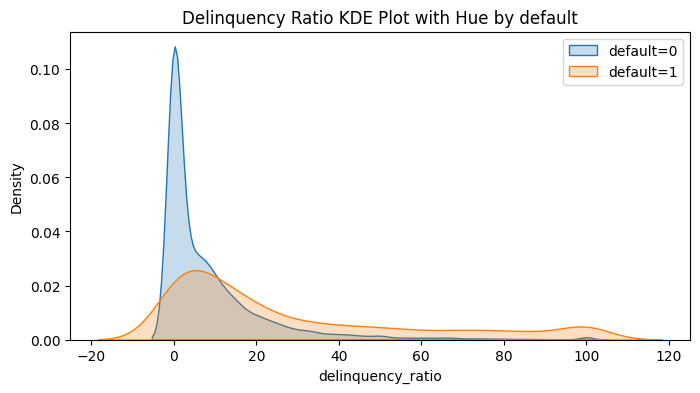

In [190]:
plt.figure(figsize=(8, 4))
sns.kdeplot(df_train_1['delinquency_ratio'][df_train_1['default'] == 0], fill=True, label='default=0')
sns.kdeplot(df_train_1['delinquency_ratio'][df_train_1['default'] == 1], fill=True, label='default=1')
plt.title(f"Delinquency Ratio KDE Plot with Hue by default")
plt.legend()
plt.show()

<h3 align="left">Insights</h3>
1. Blue graph has majority of its values on lower side of LTI
2. Orange graph has many values when delinquency ratio is higher indicating some correlation on default

In [191]:
# generate avg dpd per delinquency
df_train_1['avg_dpd_per_delinquency'] = np.where(
    df_train_1['delinquent_months'] != 0,
    (df_train_1['total_dpd'] / df_train_1['delinquent_months']).round(1),
    0
)


df_train_1.shape


(37488, 36)

In [192]:
df_test_1['avg_dpd_per_delinquency'] = np.where(
    df_test_1['delinquent_months'] != 0,
    (df_test_1['total_dpd'] / df_test_1['delinquent_months']).round(1),
    0
)


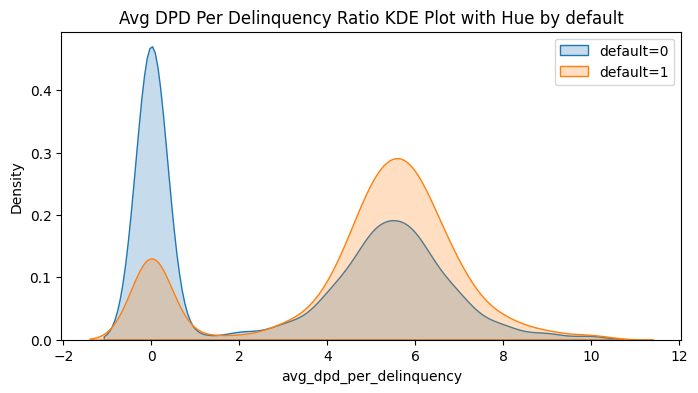

In [193]:
plt.figure(figsize=(8, 4))
sns.kdeplot(df_train_1['avg_dpd_per_delinquency'][df_train_1['default'] == 0], fill=True, label='default=0')
sns.kdeplot(df_train_1['avg_dpd_per_delinquency'][df_train_1['default'] == 1], fill=True, label='default=1')
plt.title(f"Avg DPD Per Delinquency Ratio KDE Plot with Hue by default")
plt.legend()
plt.show()

<h3>Insights</h3>

1. Graph clearly shows more occurances of default cases when avg_dpd_per_delinquency is high. This means this column is a strong predictor

In [194]:
df_train_1.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default',
       'loan_to_income', 'delinquency_ratio', 'avg_dpd_per_delinquency'],
      dtype='object')

In [195]:
# drop columns like cust_id, loan_id 
df_train_1 = df_train_1.drop(['cust_id', 'loan_id'], axis=1)

# further drop columns like disbursal_date, installment_start_dt, loan_amount, income, total_loan_months, delinquent_months, total_dpd  
df_train_2 = df_train_1.drop(['disbursal_date', 'installment_start_dt', 'loan_amount', 'income', 'total_loan_months', 'delinquent_months', 'total_dpd'], axis=1)

# drop columns like cust_id, loan_id 
df_test_1 = df_test_1.drop(['cust_id', 'loan_id'], axis=1)

# further drop columns like disbursal_date, installment_start_dt, loan_amount, income, total_loan_months, delinquent_months, total_dpd  
df_test_2 = df_test_1.drop(['disbursal_date', 'installment_start_dt', 'loan_amount', 'income', 'total_loan_months', 'delinquent_months', 'total_dpd'], axis=1)

df_train_2.columns

Index(['age', 'gender', 'marital_status', 'employment_status',
       'number_of_dependants', 'residence_type', 'years_at_current_address',
       'city', 'state', 'zipcode', 'loan_purpose', 'loan_type',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'default', 'loan_to_income',
       'delinquency_ratio', 'avg_dpd_per_delinquency'],
      dtype='object')

In [196]:
df_test_2.columns

Index(['age', 'gender', 'marital_status', 'employment_status',
       'number_of_dependants', 'residence_type', 'years_at_current_address',
       'city', 'state', 'zipcode', 'loan_purpose', 'loan_type',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'default', 'loan_to_income',
       'delinquency_ratio', 'avg_dpd_per_delinquency'],
      dtype='object')

columns have been dropped as it do not have direct impact of default risk

In [197]:
from sklearn.preprocessing import MinMaxScaler
# target variable y and and feature variables X
y_train = df_train_2['default']
X_train = df_train_2.drop('default', axis=1)

cols_to_scale = X_train.select_dtypes(include=['int64', 'float64']).columns

# scale the features
scaler = MinMaxScaler()
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_train.describe()










,age,number_of_dependants,years_at_current_address,zipcode,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
count,37488.000,37488.000,37488.000,37488.000,37488.000,37488.000,37488.000,37488.000,37488.000,37488.000,37488.000,37488.000,37488.000,37488.000,37488.000,37488.000,37488.000,37488.000
mean,0.414,0.389,0.500,0.524,0.089,0.083,0.083,0.083,0.377,0.262,0.124,0.501,0.501,0.501,0.439,0.294,0.103,0.328
std,0.190,0.307,0.297,0.286,0.120,0.112,0.112,0.112,0.235,0.244,0.133,0.373,0.407,0.254,0.297,0.228,0.173,0.291
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.288,0.000,0.233,0.325,0.021,0.019,0.019,0.019,0.189,0.078,0.034,0.000,0.000,0.375,0.182,0.110,0.000,0.000
50%,0.404,0.400,0.500,0.492,0.049,0.046,0.046,0.046,0.340,0.194,0.083,0.667,0.500,0.500,0.394,0.201,0.037,0.430
75%,0.538,0.600,0.767,0.763,0.098,0.096,0.096,0.096,0.547,0.352,0.155,1.000,1.000,0.625,0.677,0.506,0.129,0.573
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [198]:
# do same for df_test_2
X_test = df_test_2.drop('default', axis=1)
y_test = df_test_2['default']
cols_to_scale = X_test.select_dtypes(include=['int64', 'float64']).columns
X_test[cols_to_scale] = scaler.fit_transform(X_test[cols_to_scale])
X_test.describe()



,age,number_of_dependants,years_at_current_address,zipcode,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
count,12497.000,12497.000,12497.000,12497.000,12497.000,12497.000,12497.000,12497.000,12497.000,12497.000,12497.000,12497.000,12497.000,12497.000,12497.000,12497.000,12497.000,12497.000
mean,0.415,0.385,0.503,0.525,0.091,0.086,0.086,0.086,0.375,0.265,0.132,0.497,0.500,0.501,0.436,0.292,0.106,0.334
std,0.189,0.307,0.298,0.286,0.123,0.117,0.117,0.117,0.234,0.245,0.144,0.373,0.407,0.254,0.295,0.225,0.173,0.290
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.288,0.000,0.233,0.325,0.021,0.020,0.020,0.020,0.189,0.080,0.036,0.000,0.000,0.375,0.182,0.112,0.000,0.000
50%,0.423,0.400,0.500,0.510,0.051,0.048,0.048,0.048,0.340,0.198,0.089,0.333,0.500,0.500,0.394,0.200,0.042,0.440
75%,0.538,0.600,0.767,0.763,0.099,0.099,0.099,0.099,0.547,0.357,0.167,0.667,1.000,0.625,0.677,0.497,0.134,0.580
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [199]:
# apply variance inflation factor to check the multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df['Column'] = data.columns
    vif_df['VIF'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df



vif_df = calculate_vif(X_train[cols_to_scale])
vif_df







,Column,VIF
0,age,5.701
1,number_of_dependants,2.730
2,years_at_current_address,3.423
3,zipcode,3.798
4,sanction_amount,101.087
5,processing_fee,inf
6,gst,inf
7,net_disbursement,inf
8,loan_tenure_months,6.181
9,principal_outstanding,16.326


In [200]:
# features to drop based on vif
features_to_drop_vif = ['sanction_amount', 'processing_fee', 'gst', 'net_disbursement','principal_outstanding']


X_train_1 = X_train.drop(features_to_drop_vif, axis='columns')
numeric_columns_1 = X_train_1.select_dtypes(['int64', 'float64']).columns
numeric_columns_1

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency'],
      dtype='object')

In [201]:
# features to drop based on vif
features_to_drop_vif = ['sanction_amount', 'processing_fee', 'gst', 'net_disbursement','principal_outstanding']


X_test_1 = X_test.drop(features_to_drop_vif, axis='columns')
numeric_columns_1 = X_test_1.select_dtypes(['int64', 'float64']).columns
numeric_columns_1

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency'],
      dtype='object')

In [202]:
vif_df_1 = calculate_vif(X_train_1[numeric_columns_1])

In [203]:
selected_numeric_columns = vif_df_1[vif_df_1['VIF']<5]['Column'].tolist()
selected_numeric_columns





['number_of_dependants',
 'years_at_current_address',
 'zipcode',
 'bank_balance_at_application',
 'number_of_open_accounts',
 'number_of_closed_accounts',
 'credit_utilization_ratio',
 'loan_to_income',
 'delinquency_ratio',
 'avg_dpd_per_delinquency']

In [204]:
df_train_3 = df_train_2[selected_numeric_columns]







In [205]:
df_test_3 = df_test_2[selected_numeric_columns]

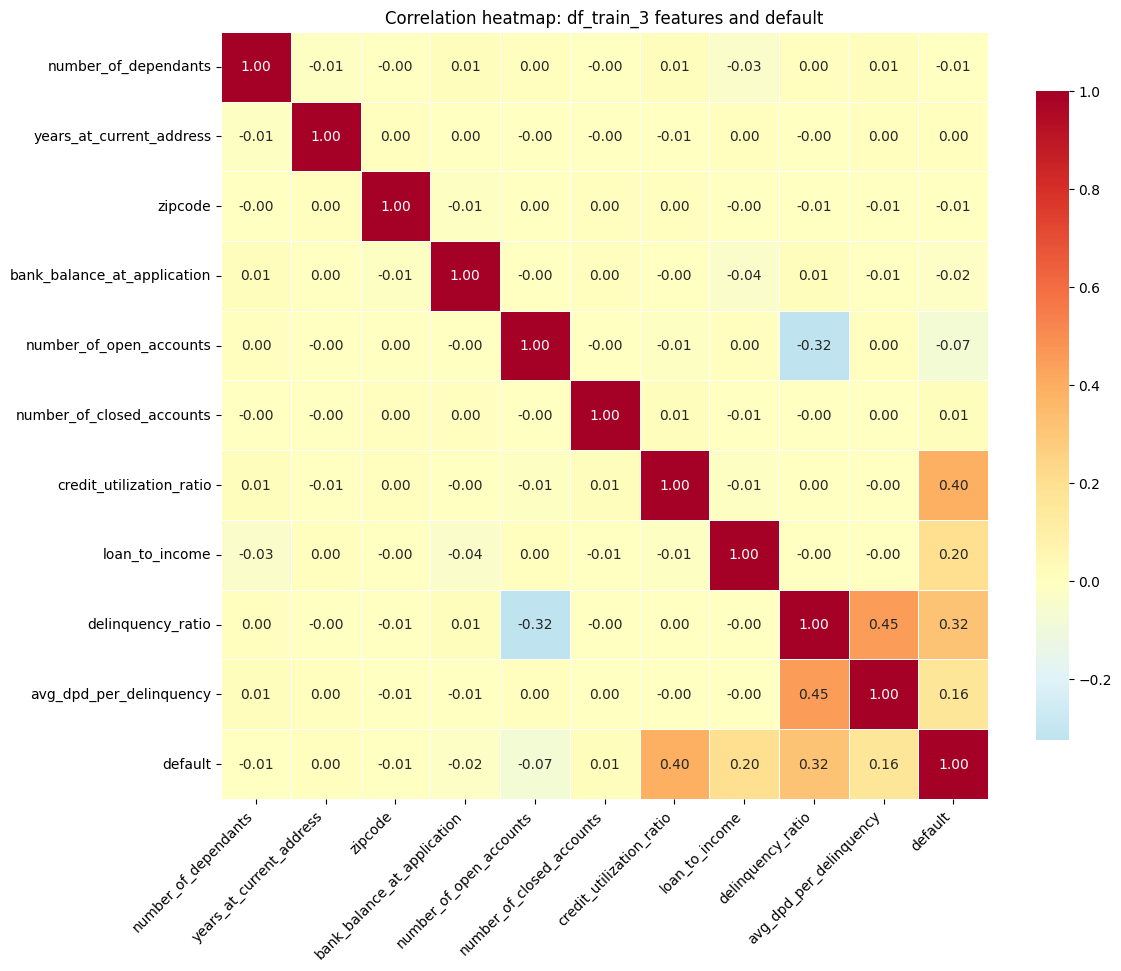

In [206]:
# draw heatmap for df_train_3 values and default value from df_train_2

# Combine df_train_3 with default from df_train_2 for correlation heatmap
heatmap_data = df_train_3.copy()
heatmap_data['default'] = df_train_2['default'].values

# Correlation matrix
corr = heatmap_data.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='RdYlBu_r', center=0, 
            square=True, linewidths=0.5, cbar_kws={'shrink': 0.8})
plt.title('Correlation heatmap: df_train_3 features and default')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



<h3>Feature Selection: Categoricals Variables </h3>

In [207]:
def calculate_woe_iv(df, feature, target):
    grouped = df.groupby(feature)[target].agg(['count','sum'])
    grouped = grouped.rename(columns={'count': 'total', 'sum': 'good'})
    grouped['bad']=grouped['total']-grouped['good']
    
    total_good = grouped['good'].sum()
    total_bad = grouped['bad'].sum()
    
    grouped['good_pct'] = grouped['good'] / total_good
    grouped['bad_pct'] = grouped['bad'] / total_bad
    grouped['woe'] = np.log(grouped['good_pct']/ grouped['bad_pct'])
    grouped['iv'] = (grouped['good_pct'] -grouped['bad_pct'])*grouped['woe']
    
    grouped['woe'] = grouped['woe'].replace([np.inf, -np.inf], 0)
    grouped['iv'] = grouped['iv'].replace([np.inf, -np.inf], 0)
    
    total_iv = grouped['iv'].sum()
    
    return grouped, total_iv

grouped, total_iv = calculate_woe_iv(pd.concat([X_train_1, y_train],axis=1), 'loan_purpose', 'default')
grouped

,total,good,bad,good_pct,bad_pct,woe,iv
loan_purpose,,,,,,,
Auto,7447,327,7120,0.101,0.208,-0.717,0.076
Education,5620,559,5061,0.173,0.148,0.161,0.004
Home,11304,1734,9570,0.538,0.279,0.656,0.170
Personal,13117,603,12514,0.187,0.365,-0.669,0.119


In [208]:
X_train_1.columns

Index(['age', 'gender', 'marital_status', 'employment_status',
       'number_of_dependants', 'residence_type', 'years_at_current_address',
       'city', 'state', 'zipcode', 'loan_purpose', 'loan_type',
       'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency'],
      dtype='object')

In [209]:
X_test_1.columns

Index(['age', 'gender', 'marital_status', 'employment_status',
       'number_of_dependants', 'residence_type', 'years_at_current_address',
       'city', 'state', 'zipcode', 'loan_purpose', 'loan_type',
       'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency'],
      dtype='object')

In [210]:
iv_values = {}

for feature in X_train_1.columns:
    if X_train_1[feature].dtype == 'object':
        _, iv = calculate_woe_iv(pd.concat([X_train_1, y_train],axis=1), feature, 'default' )
    else:
        X_binned = pd.cut(X_train_1[feature], bins=10, labels=False)
        _, iv = calculate_woe_iv(pd.concat([X_binned, y_train],axis=1), feature, 'default' )
    iv_values[feature] = iv
        
iv_values

{'age': np.float64(0.0890689462679479),
 'gender': np.float64(0.00047449502170914947),
 'marital_status': np.float64(0.001129766845390142),
 'employment_status': np.float64(0.003953046301722585),
 'number_of_dependants': np.float64(0.0019380899135053508),
 'residence_type': np.float64(0.246745268718145),
 'years_at_current_address': np.float64(0.0020800513608156363),
 'city': np.float64(0.0019059578709781529),
 'state': np.float64(0.0019005589806779287),
 'zipcode': np.float64(0.0016677413243392572),
 'loan_purpose': np.float64(0.3691197842282755),
 'loan_type': np.float64(0.16319324904149224),
 'loan_tenure_months': np.float64(0.21893515090196278),
 'bank_balance_at_application': np.float64(0.0063187993277516365),
 'number_of_open_accounts': np.float64(0.08463134083005877),
 'number_of_closed_accounts': np.float64(0.0011964272592421567),
 'enquiry_count': np.float64(0.007864214085342608),
 'credit_utilization_ratio': np.float64(2.352965568168245),
 'loan_to_income': np.float64(0.47641

In [211]:
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))

iv_df = pd.DataFrame(list(iv_values.items()), columns=['Feature', 'IV'])
iv_df = iv_df.sort_values(by='IV', ascending=False)
iv_df

,Feature,IV
17,credit_utilization_ratio,2.353
19,delinquency_ratio,0.717
18,loan_to_income,0.476
20,avg_dpd_per_delinquency,0.402
10,loan_purpose,0.369
5,residence_type,0.247
12,loan_tenure_months,0.219
11,loan_type,0.163
0,age,0.089
14,number_of_open_accounts,0.085


In [212]:
# select features that has IV > 0.02
selected_features_iv = [feature for feature, iv in iv_values.items() if iv > 0.02]
selected_features_iv

['age',
 'residence_type',
 'loan_purpose',
 'loan_type',
 'loan_tenure_months',
 'number_of_open_accounts',
 'credit_utilization_ratio',
 'loan_to_income',
 'delinquency_ratio',
 'avg_dpd_per_delinquency']

<h3>Feature Encoding </h3>

In [213]:
X_train_reduced = X_train_1[selected_features_iv]
X_test_reduced = X_test_1[selected_features_iv]
X_train_reduced.shape, X_test_reduced.shape




((37488, 10), (12497, 10))

In [214]:
# encode X_train_reduced and X_test_reduced
X_train_reduced = pd.get_dummies(X_train_reduced, drop_first=True)
X_test_reduced = pd.get_dummies(X_test_reduced, drop_first=True )
X_train_reduced.shape, X_test_reduced.shape




((37488, 13), (12497, 13))

<h2 align="center" style="color:Blue">Model Training </h2>

<h3 align="left">Attempt 1 </h3>
<p>Logistic Regression, Random Forest and XGB</p>
<p>no handling of class imbalance </p> 

In [215]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(X_train_reduced, y_train)

y_pred = model.predict(X_test_reduced)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11423
           1       0.85      0.71      0.78      1074

    accuracy                           0.96     12497
   macro avg       0.91      0.85      0.88     12497
weighted avg       0.96      0.96      0.96     12497



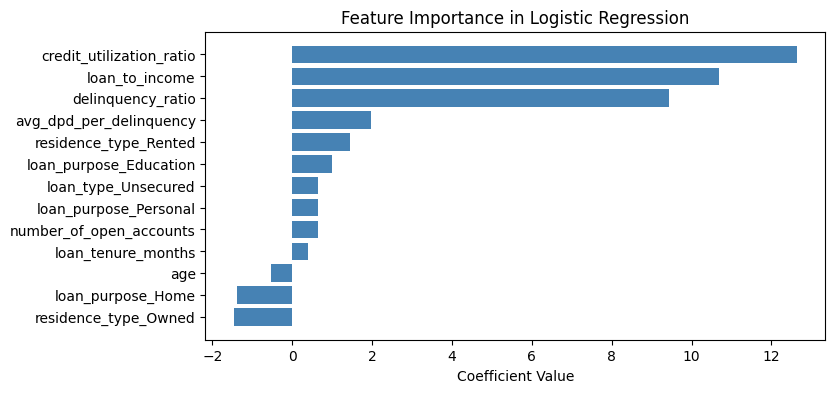

In [216]:
feature_importance = model.coef_[0]

# Create a DataFrame for easier handling
coef_df = pd.DataFrame(feature_importance, index=X_train_reduced.columns, columns=['Coefficients'])

# Sort the coefficients for better visualization
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

# Plotting
plt.figure(figsize=(8, 4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Logistic Regression')
plt.show()

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11423
           1       0.86      0.71      0.78      1074

    accuracy                           0.96     12497
   macro avg       0.92      0.85      0.88     12497
weighted avg       0.96      0.96      0.96     12497



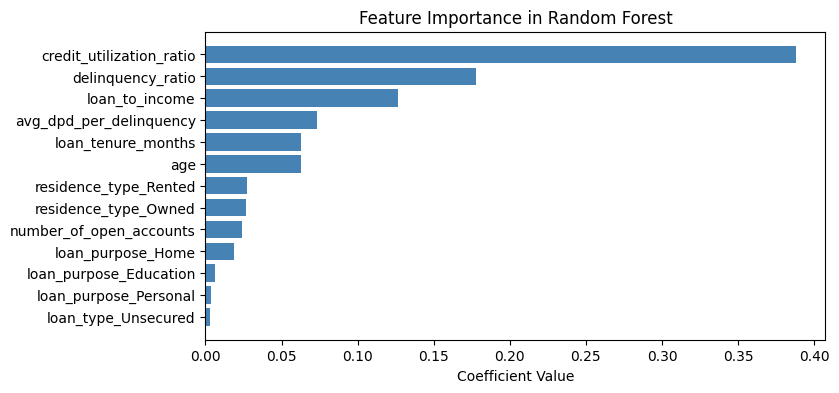

In [217]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train_reduced, y_train)

y_pred = model.predict(X_test_reduced)
report = classification_report(y_test, y_pred)
print(report)
feature_importance = model.feature_importances_

# Create a DataFrame for easier handling
coef_df = pd.DataFrame(feature_importance, index=X_train_reduced.columns, columns=['Coefficients'])

# Sort the coefficients for better visualization
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

# Plotting
plt.figure(figsize=(8, 4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Random Forest')
plt.show()

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11423
           1       0.83      0.76      0.79      1074

    accuracy                           0.97     12497
   macro avg       0.90      0.87      0.89     12497
weighted avg       0.96      0.97      0.96     12497



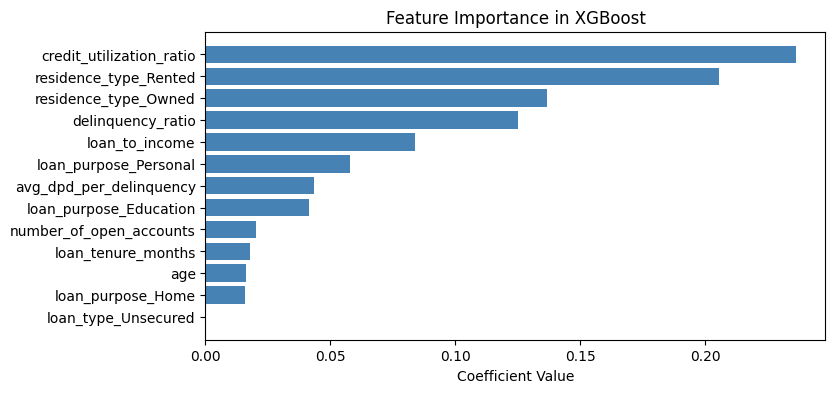

In [218]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train_reduced, y_train)

y_pred = model.predict(X_test_reduced)
report = classification_report(y_test, y_pred)
print(report)
feature_importance = model.feature_importances_

# Create a DataFrame for easier handling
coef_df = pd.DataFrame(feature_importance, index=X_train_reduced.columns, columns=['Coefficients'])

# Sort the coefficients for better visualization
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

# Plotting
plt.figure(figsize=(8, 4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in XGBoost')
plt.show()






Since there is not much difference between XGB and Logistic, we will choose LogisticRegression as a candidate for our RandomizedSearchCV candidate it has a better interpretation.

<h3> Random Search CV for attempt 1: Logistic Regression </h3>

In [219]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'C': np.logspace(-4, 4, 20),  # Logarithmically spaced values from 10^-4 to 10^4
    'solver': ['lbfgs', 'saga', 'liblinear', 'newton-cg']   # Algorithm to use in the optimization problem
}

# Create the Logistic Regression model
log_reg = LogisticRegression(max_iter=10000)  # Increased max_iter for convergence

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=log_reg,
    param_distributions=param_dist,
    n_iter=50,  # Number of parameter settings that are sampled
    scoring='f1',
    cv=3,  # 5-fold cross-validation
    verbose=2,
    random_state=42,  # Set a random state for reproducibility
    n_jobs=-1  # Use all available cores
)

# Fit the RandomizedSearchCV to the training data
random_search.fit(X_train_reduced, y_train)

# Print the best parameters and best score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_reduced)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'solver': 'liblinear', 'C': np.float64(1438.44988828766)}
Best Score: 0.7578820896729832
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     11423
           1       0.84      0.73      0.78      1074

    accuracy                           0.96     12497
   macro avg       0.91      0.86      0.88     12497
weighted avg       0.96      0.96      0.96     12497



<h3>Randomized Search CV for attempt 1: XGBoost </h3>

In [220]:
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV

# Define parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'scale_pos_weight': [1, 2, 3, 5, 7, 10],
    'reg_alpha': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0],  # L1 regularization term
    'reg_lambda': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0]  # L2 regularization term
}

xgb = XGBClassifier()

random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_dist, n_iter=100,
                                   scoring='f1', cv=3, verbose=1, n_jobs=-1, random_state=42)

random_search.fit(X_train_reduced, y_train)

# Print the best parameters and best score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_reduced)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Parameters: {'subsample': 0.8, 'scale_pos_weight': 2, 'reg_lambda': 1.0, 'reg_alpha': 5.0, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.2, 'colsample_bytree': 0.9}
Best Score: 0.7883672970285227
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11423
           1       0.77      0.83      0.80      1074

    accuracy                           0.96     12497
   macro avg       0.88      0.90      0.89     12497
weighted avg       0.97      0.96      0.97     12497



<h2>Attempt 2 </h2>
<p>Logistic Regression & XGB</p>
<p>Handle Class Imbalance Using Under Sampling</p>

In [221]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_train_res, y_train_res = rus.fit_resample(X_train_reduced, y_train)
y_train_res.value_counts()

default
0    3223
1    3223
Name: count, dtype: int64

In [222]:
model = LogisticRegression()
model.fit(X_train_res, y_train_res)

y_pred = model.predict(X_test_reduced)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     11423
           1       0.51      0.95      0.67      1074

    accuracy                           0.92     12497
   macro avg       0.75      0.93      0.81     12497
weighted avg       0.95      0.92      0.93     12497



In [223]:
model = XGBClassifier(**random_search.best_params_)
model.fit(X_train_res, y_train_res)

y_pred = model.predict(X_test_reduced)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     11423
           1       0.51      0.98      0.67      1074

    accuracy                           0.92     12497
   macro avg       0.75      0.95      0.81     12497
weighted avg       0.96      0.92      0.93     12497



<h2>Attempt-3 : </h2>
<p>Logistic Regression </p>
<p>Handle Class Imbalance Using SMOTE Tomek</p>
<p>Parameter tunning using optuna</p>

In [224]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=42)
X_train_smt, y_train_smt = smt.fit_resample(X_train_reduced, y_train)
y_train_smt.value_counts()

default
0    34195
1    34195
Name: count, dtype: int64

In [225]:
model = LogisticRegression()
model.fit(X_train_smt, y_train_smt)

y_pred = model.predict(X_test_reduced)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11423
           1       0.56      0.94      0.70      1074

    accuracy                           0.93     12497
   macro avg       0.78      0.94      0.83     12497
weighted avg       0.96      0.93      0.94     12497



In [226]:
import optuna
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import cross_val_score

In [227]:
# Define the objective function for Optuna
def objective(trial):
    param = {
        'C': trial.suggest_float('C', 1e-4, 1e4, log=True),  # Logarithmically spaced values
        'solver': trial.suggest_categorical('solver', ['lbfgs', 'liblinear', 'saga', 'newton-cg']),  # Solvers
        'tol': trial.suggest_float('tol', 1e-6, 1e-1, log=True),  # Logarithmically spaced values for tolerance
        'class_weight': trial.suggest_categorical('class_weight', [None, 'balanced'])  # Class weights
    }

    model = LogisticRegression(**param, max_iter=10000)
    
    # Calculate the cross-validated f1_score
    f1_scorer = make_scorer(f1_score, average='macro')
    scores = cross_val_score(model, X_train_smt, y_train_smt, cv=3, scoring=f1_scorer, n_jobs=-1)
    
    return np.mean(scores)

study_logistic = optuna.create_study(direction='maximize')
study_logistic.optimize(objective, n_trials=50)

[I 2026-02-26 12:08:34,686] A new study created in memory with name: no-name-e3d2fd75-7c21-4aa1-80af-62e08e8477c0
[I 2026-02-26 12:08:34,898] Trial 0 finished with value: 0.8592164996367112 and parameters: {'C': 2833.4902449834995, 'solver': 'newton-cg', 'tol': 0.05842740465466882, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.8592164996367112.
[I 2026-02-26 12:08:35,061] Trial 1 finished with value: 0.7677217442750296 and parameters: {'C': 9455.044172965221, 'solver': 'lbfgs', 'tol': 0.09320276212458525, 'class_weight': None}. Best is trial 0 with value: 0.8592164996367112.
[I 2026-02-26 12:08:35,479] Trial 2 finished with value: 0.9456495554919422 and parameters: {'C': 219.18375785211137, 'solver': 'liblinear', 'tol': 0.0033197767465226297, 'class_weight': 'balanced'}. Best is trial 2 with value: 0.9456495554919422.
[I 2026-02-26 12:08:36,005] Trial 3 finished with value: 0.9084684280952952 and parameters: {'C': 0.0012693252959977395, 'solver': 'saga', 'tol': 4.133653679

In [228]:
print('Best trial:')
trial = study_logistic.best_trial
print('  F1-score: {}'.format(trial.value))
print('  Params: ')
for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))
    
best_model_logistic = LogisticRegression(**study_logistic.best_params)
best_model_logistic.fit(X_train_smt, y_train_smt)

# Evaluate on the test set
y_pred = best_model_logistic.predict(X_test_reduced)

report = classification_report(y_test, y_pred)
print(report)

Best trial:
  F1-score: 0.9458528383666086
  Params: 
    C: 3.8122195343115317
    solver: liblinear
    tol: 5.789667039530194e-05
    class_weight: None
              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11423
           1       0.56      0.94      0.70      1074

    accuracy                           0.93     12497
   macro avg       0.78      0.94      0.83     12497
weighted avg       0.96      0.93      0.94     12497



<h2>Attempt 4: </h2>
<p>XGBoost </p>
<p> Handle Class Imbalance Using SMOTE Tomek </p>
<p> Parameter tunning using optuna </p>

In [229]:
# Define the objective function for Optuna
def objective(trial):
    param = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'verbosity': 0,
        'booster': 'gbtree',
        'lambda': trial.suggest_float('lambda', 1e-3, 10.0, log=True),
        'alpha': trial.suggest_float('alpha', 1e-3, 10.0, log=True),
        'subsample': trial.suggest_float('subsample', 0.4, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.4, 1.0),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'eta': trial.suggest_float('eta', 0.01, 0.3),
        'gamma': trial.suggest_float('gamma', 0, 10),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'max_delta_step': trial.suggest_int('max_delta_step', 0, 10)
    }

    model = XGBClassifier(**param)
    
    # Calculate the cross-validated f1_score
    f1_scorer = make_scorer(f1_score, average='macro')
    scores = cross_val_score(model, X_train_smt, y_train_smt, cv=3, scoring=f1_scorer, n_jobs=-1)
    
    return np.mean(scores)

study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective, n_trials=50)

[I 2026-02-26 12:08:56,079] A new study created in memory with name: no-name-809a7255-9920-49d6-a4b3-b0da07e2b7e3
[I 2026-02-26 12:08:57,730] Trial 0 finished with value: 0.9592292755073659 and parameters: {'lambda': 0.704732689555036, 'alpha': 5.312223406075478, 'subsample': 0.7114106559315243, 'colsample_bytree': 0.740604362781456, 'max_depth': 10, 'eta': 0.08820909374947855, 'gamma': 5.743232141372779, 'scale_pos_weight': 7.2774119477073755, 'min_child_weight': 9, 'max_delta_step': 8}. Best is trial 0 with value: 0.9592292755073659.
[I 2026-02-26 12:08:59,708] Trial 1 finished with value: 0.9644720410333448 and parameters: {'lambda': 3.3546239599982735, 'alpha': 1.3690685641294986, 'subsample': 0.9265907727353462, 'colsample_bytree': 0.9456129699232209, 'max_depth': 10, 'eta': 0.07066147417853771, 'gamma': 1.004794105394935, 'scale_pos_weight': 9.484375907428726, 'min_child_weight': 6, 'max_delta_step': 10}. Best is trial 1 with value: 0.9644720410333448.
[I 2026-02-26 12:09:00,825]

In [230]:
print('Best trial:')
trial = study_xgb.best_trial
print('  F1-score: {}'.format(trial.value))
print('  Params: ')
for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))
    
best_params = study_xgb.best_params
best_model_xgb = XGBClassifier(**best_params)
best_model_xgb.fit(X_train_smt, y_train_smt)

# Evaluate on the test set
y_pred = best_model_xgb.predict(X_test_reduced)

report = classification_report(y_test, y_pred)
print(report)

Best trial:
  F1-score: 0.9745497733572664
  Params: 
    lambda: 0.0017661883524013298
    alpha: 1.5766860533209186
    subsample: 0.9082440098719875
    colsample_bytree: 0.8535351884265768
    max_depth: 8
    eta: 0.24773125020202139
    gamma: 0.7130164805078986
    scale_pos_weight: 3.351717231978056
    min_child_weight: 3
    max_delta_step: 1
              precision    recall  f1-score   support

           0       0.99      0.96      0.98     11423
           1       0.69      0.89      0.78      1074

    accuracy                           0.96     12497
   macro avg       0.84      0.92      0.88     12497
weighted avg       0.96      0.96      0.96     12497



<h2>Model Evaluation : ROC/AUC</h2>

In [231]:
y_pred = best_model_logistic.predict(X_test_reduced)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11423
           1       0.56      0.94      0.70      1074

    accuracy                           0.93     12497
   macro avg       0.78      0.94      0.83     12497
weighted avg       0.96      0.93      0.94     12497



In [232]:
from sklearn.metrics import roc_curve

probabilities = best_model_logistic.predict_proba(X_test_reduced)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, probabilities)

fpr[:5], tpr[:5], thresholds[:5]

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.75426771e-05,
        8.75426771e-05]),
 array([0.        , 0.0009311 , 0.15921788, 0.15921788, 0.17690875]),
 array([       inf, 1.        , 0.99939901, 0.99938463, 0.99923167]))

In [233]:
from sklearn.metrics import auc

area = auc(fpr, tpr)
area

0.9836547877611752

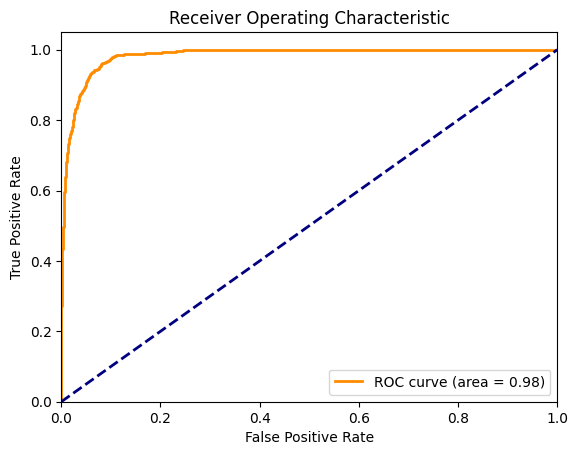

In [234]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

<h2>Model Evaluation : Rankordering, KS statistic, Gini coeff</h2>

In [235]:
probabilities = best_model_logistic.predict_proba(X_test_reduced)[:,1]

df_eval = pd.DataFrame({
    'Default Truth': y_test,
    'Default Probability': probabilities
})
df_eval.head(3)

,Default Truth,Default Probability
19205,0,0.525
15514,0,0.000
30367,0,0.006


In [236]:
df_eval['Decile'] = pd.qcut(df_eval['Default Probability'], 10, labels=False, duplicates='drop')
df_eval.head(3)

,Default Truth,Default Probability,Decile
19205,0,0.525,8
15514,0,0.000,2
30367,0,0.006,6


In [237]:
df_eval[df_eval.Decile==8]['Default Probability'].describe()

count   1250.000
mean       0.481
std        0.181
min        0.214
25%        0.317
50%        0.463
75%        0.633
max        0.815
Name: Default Probability, dtype: float64

In [238]:
df_decile = df_eval.groupby('Decile').apply(lambda x: pd.Series({
    'Minimum Probability': x['Default Probability'].min(),
    'Maximum Probability': x['Default Probability'].max(),
    'Events': x['Default Truth'].sum(),
    'Non-events': x['Default Truth'].count() - x['Default Truth'].sum(),    
}))
df_decile.reset_index(inplace=True)
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events
0,0,0.000,0.000,0.000,1250.000
1,1,0.000,0.000,0.000,1250.000
2,2,0.000,0.000,0.000,1249.000
3,3,0.000,0.000,0.000,1250.000
4,4,0.000,0.001,0.000,1250.000
5,5,0.001,0.005,0.000,1249.000
6,6,0.005,0.029,5.000,1245.000
7,7,0.029,0.214,9.000,1240.000
8,8,0.214,0.815,163.000,1087.000
9,9,0.815,1.000,897.000,353.000


In [239]:
df_decile['Event Rate'] = df_decile['Events']*100 / (df_decile['Events']+df_decile['Non-events'])
df_decile['Non-event Rate'] = df_decile['Non-events']*100 / (df_decile['Events']+df_decile['Non-events'])
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate
0,0,0.000,0.000,0.000,1250.000,0.000,100.000
1,1,0.000,0.000,0.000,1250.000,0.000,100.000
2,2,0.000,0.000,0.000,1249.000,0.000,100.000
3,3,0.000,0.000,0.000,1250.000,0.000,100.000
4,4,0.000,0.001,0.000,1250.000,0.000,100.000
5,5,0.001,0.005,0.000,1249.000,0.000,100.000
6,6,0.005,0.029,5.000,1245.000,0.400,99.600
7,7,0.029,0.214,9.000,1240.000,0.721,99.279
8,8,0.214,0.815,163.000,1087.000,13.040,86.960
9,9,0.815,1.000,897.000,353.000,71.760,28.240


In [240]:
df_decile = df_decile.sort_values(by='Decile', ascending=False).reset_index(drop=True)
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate
0,9,0.815,1.000,897.000,353.000,71.760,28.240
1,8,0.214,0.815,163.000,1087.000,13.040,86.960
2,7,0.029,0.214,9.000,1240.000,0.721,99.279
3,6,0.005,0.029,5.000,1245.000,0.400,99.600
4,5,0.001,0.005,0.000,1249.000,0.000,100.000
5,4,0.000,0.001,0.000,1250.000,0.000,100.000
6,3,0.000,0.000,0.000,1250.000,0.000,100.000
7,2,0.000,0.000,0.000,1249.000,0.000,100.000
8,1,0.000,0.000,0.000,1250.000,0.000,100.000
9,0,0.000,0.000,0.000,1250.000,0.000,100.000


In [241]:
df_decile['Cum Events'] =  df_decile['Events'].cumsum()
df_decile['Cum Non-events'] =  df_decile['Non-events'].cumsum()
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate,Cum Events,Cum Non-events
0,9,0.815,1.000,897.000,353.000,71.760,28.240,897.000,353.000
1,8,0.214,0.815,163.000,1087.000,13.040,86.960,1060.000,1440.000
2,7,0.029,0.214,9.000,1240.000,0.721,99.279,1069.000,2680.000
3,6,0.005,0.029,5.000,1245.000,0.400,99.600,1074.000,3925.000
4,5,0.001,0.005,0.000,1249.000,0.000,100.000,1074.000,5174.000
5,4,0.000,0.001,0.000,1250.000,0.000,100.000,1074.000,6424.000
6,3,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,7674.000
7,2,0.000,0.000,0.000,1249.000,0.000,100.000,1074.000,8923.000
8,1,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,10173.000
9,0,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,11423.000


In [242]:
df_decile['Cum Event Rate'] = df_decile['Cum Events'] * 100 / df_decile['Events'].sum()
df_decile['Cum Non-event Rate'] = df_decile['Cum Non-events']*100 / df_decile['Non-events'].sum()
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate,Cum Events,Cum Non-events,Cum Event Rate,Cum Non-event Rate
0,9,0.815,1.000,897.000,353.000,71.760,28.240,897.000,353.000,83.520,3.090
1,8,0.214,0.815,163.000,1087.000,13.040,86.960,1060.000,1440.000,98.696,12.606
2,7,0.029,0.214,9.000,1240.000,0.721,99.279,1069.000,2680.000,99.534,23.461
3,6,0.005,0.029,5.000,1245.000,0.400,99.600,1074.000,3925.000,100.000,34.361
4,5,0.001,0.005,0.000,1249.000,0.000,100.000,1074.000,5174.000,100.000,45.295
5,4,0.000,0.001,0.000,1250.000,0.000,100.000,1074.000,6424.000,100.000,56.237
6,3,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,7674.000,100.000,67.180
7,2,0.000,0.000,0.000,1249.000,0.000,100.000,1074.000,8923.000,100.000,78.114
8,1,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,10173.000,100.000,89.057
9,0,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,11423.000,100.000,100.000


In [243]:
df_decile['KS'] = abs(df_decile['Cum Event Rate'] - df_decile['Cum Non-event Rate'])
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate,Cum Events,Cum Non-events,Cum Event Rate,Cum Non-event Rate,KS
0,9,0.815,1.000,897.000,353.000,71.760,28.240,897.000,353.000,83.520,3.090,80.429
1,8,0.214,0.815,163.000,1087.000,13.040,86.960,1060.000,1440.000,98.696,12.606,86.090
2,7,0.029,0.214,9.000,1240.000,0.721,99.279,1069.000,2680.000,99.534,23.461,76.073
3,6,0.005,0.029,5.000,1245.000,0.400,99.600,1074.000,3925.000,100.000,34.361,65.639
4,5,0.001,0.005,0.000,1249.000,0.000,100.000,1074.000,5174.000,100.000,45.295,54.705
5,4,0.000,0.001,0.000,1250.000,0.000,100.000,1074.000,6424.000,100.000,56.237,43.763
6,3,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,7674.000,100.000,67.180,32.820
7,2,0.000,0.000,0.000,1249.000,0.000,100.000,1074.000,8923.000,100.000,78.114,21.886
8,1,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,10173.000,100.000,89.057,10.943
9,0,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,11423.000,100.000,100.000,0.000


To assess whether rank ordering is followed, we should look at whether higher deciles (those with higher predicted probabilities) have higher event rates compared to lower deciles. Rank ordering means that as you move from the top decile to the bottom decile, the event rate should generally decrease.

Non-Events - termed as good (customers) who do not default. Events - termed as bad (customers) who default.

Events and Non-Events terms are interchanged based on usecase to usecase.

eg: for marketing usecase, which customer to reach out (who will take loan based on offers) will be events - here it will termed as good, and the customers who will not take loans will be non-events (bad).

**Insights from the Decile Table**

1. Top Deciles

* The first decile (Decile 9) has a high event rate of 72.00% and a non-event rate of 28.00%. This indicates that the model is highly confident in predicting events in this decile.
* The second decile (Decile 8) also shows a significant event rate of 12.72%, with a cumulative event rate reaching 98.6%.

2. Middle Deciles:

* Deciles 7 and 6 show a significant drop in event rates

3. Lower Deciles:

* Deciles 5 to 0 show zero events, with all predictions being non-events. These deciles collectively have a non-event rate of 100%.

4. KS Statistic:

* The KS statistic, which is the maximum difference between cumulative event rates and cumulative non-event rates, is highest at Decile 8 with a value of 85.98%. This suggests that the model performs best at distinguishing between events and non-events up to this decile.

* The KS value gradually decreases in the following deciles, indicating a decrease in model performance for distinguishing between events and non-events.

**KS Value**

The highest KS value is 85.98%, found at Decile 8. This indicates that the model's performance in distinguishing between events and non-events is most significant at this decile. (If KS is in top 3 decile and score above 40, it is considered a good predictive model.)

In [245]:
gini_coefficient = 2 * area - 1

print("AUC:", area)
print("Gini Coefficient:", gini_coefficient)

AUC: 0.9836547877611752
Gini Coefficient: 0.9673095755223504


AUC of 0.98: The model is very good at distinguishing between events and non-events.

Gini coefficient of 0.96: This further confirms that the model is highly effective in its predictions, with almost perfect rank ordering capability.

The Gini coefficient ranges from -1 to 1, where a value closer to 1 signifies a perfect model, 0 indicates a model with no discriminative power, and -1 signifies a perfectly incorrect model.

<h2>Finalize The Model and Visualize Feature Importance</h2>

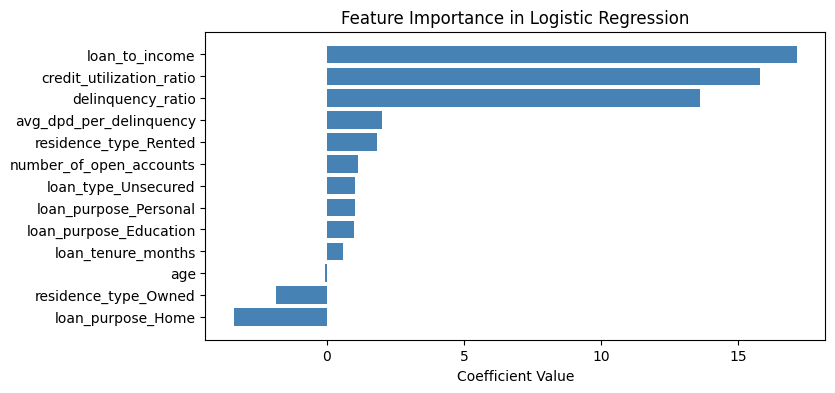

In [251]:
final_model = best_model_logistic

feature_importance = final_model.coef_[0]

# Create a DataFrame for easier handling
coef_df = pd.DataFrame(feature_importance, index=X_train_reduced.columns, columns=['Coefficients'])

# Sort the coefficients for better visualization
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

# Plotting
plt.figure(figsize=(8, 4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Logistic Regression')
plt.show()

<h2>Save the Model</h2>

In [252]:
X_test_reduced.head(2)

,age,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
19205,0.346,0.755,0.333,0.990,0.548,0.000,0.000,True,False,False,True,False,False
15514,0.481,0.226,1.000,0.323,0.219,0.000,0.000,True,False,True,False,False,False


In [253]:
X_test_reduced.columns

Index(['age', 'loan_tenure_months', 'number_of_open_accounts',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency', 'residence_type_Owned',
       'residence_type_Rented', 'loan_purpose_Education', 'loan_purpose_Home',
       'loan_purpose_Personal', 'loan_type_Unsecured'],
      dtype='object')

In [254]:
cols_to_scale

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency'],
      dtype='object')

In [255]:
X_train_reduced.columns

Index(['age', 'loan_tenure_months', 'number_of_open_accounts',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency', 'residence_type_Owned',
       'residence_type_Rented', 'loan_purpose_Education', 'loan_purpose_Home',
       'loan_purpose_Personal', 'loan_type_Unsecured'],
      dtype='object')

In [257]:
from joblib import dump

model_data = {
    'model': final_model,
    'features': X_train_reduced.columns,
    'scaler': scaler,
    'cols_to_scale': cols_to_scale
}
dump(model_data, 'D:/Desktop/OneDrive - shivameducation.net/Documents/AJIT_YADAV/CodeBasicsBootCamp/CodeBasicsProjects/ML-Projects/CreditRisk-ClassificationProject/MainProject/artifacts/model_data.joblib')

['D:/Desktop/OneDrive - shivameducation.net/Documents/AJIT_YADAV/CodeBasicsBootCamp/CodeBasicsProjects/ML-Projects/CreditRisk-ClassificationProject/MainProject/artifacts/model_data.joblib']

In [258]:
final_model.coef_, final_model.intercept_

(array([[-0.06708441,  0.6041216 ,  1.15915637, 15.78147972, 17.14218408,
         13.58505319,  2.02843095, -1.83249295,  1.82497854,  1.00115124,
         -3.38318182,  1.03424621,  1.03424621]]),
 array([-20.51536532]))